In [55]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv

# Create an empty graph
graph = nx.Graph()

In [56]:
# Open the CSV file and read the data for users
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]
        # Add the user node to graph with blue color
        graph.add_node(row[0], name=row[1], repos=row[2], color="#7FB2FD")

In [57]:
# Open the CSV file and read the data for repositories
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue

        # transform the string of languages into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]

        # Add the repository node to graph with pink color
        graph.add_node(row[0], name=row[1], languages=row[2], color="#FF8CCD")


In [58]:
# Add edges between users and repositories based on the users' list of repositories
for node in graph.nodes:
    # if it's a user node
    if node[0] == "u":
        # for each repository in the user's list of repositories
        for repo in graph.nodes[node]['repos']:
            # add an edge between the user and the repository
            graph.add_edge(node, repo)

In [59]:
# Print the number of nodes and edges
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

Number of nodes: 4358
Number of edges: 4908


In [60]:
# Draw the graph using color property to distinguish users and repositories
# nx.draw(graph, node_color=[graph.nodes[node]['color'] for node in graph.nodes], node_size=100)

In [61]:
# Calculate the degree centrality of all nodes
degree_centrality = nx.degree_centrality(graph)

# Split the degree centrality for users and repositories
users_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('u_')}
repos_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('r_')}

# Print the degree centrality of first 10 users in descending order
print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    print(node, users_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality for users:", sum(users_degree_centrality.values())/len(users_degree_centrality))

# Print the degree centrality of first 10 repositories in descending order
print("\nDegree centrality of first 10 repositories in descending order:")
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:10]:
    print(node, repos_degree_centrality[node])

# Print mean degree centrality for repositories
print("\nMean degree centrality for repositories:", sum(repos_degree_centrality.values())/len(repos_degree_centrality))


Degree centrality of first 10 users in descending order:
u_938 0.006196924489327519
u_3005 0.005737893045673629
u_1038 0.004360798714711958
u_2293 0.0034427358274041774
u_1755 0.003213220105577232
u_3269 0.003213220105577232
u_1055 0.002754188661923342
u_2137 0.002754188661923342
u_3002 0.002754188661923342
u_3056 0.002754188661923342

Mean degree centrality for users: 0.0003349578241827771

Degree centrality of first 10 repositories in descending order:
r_415 0.08836355290337389
r_281 0.08652742712875833
r_444 0.07183842093183383
r_528 0.039935735597888454
r_244 0.030525591002983705
r_981 0.022951572182694516
r_864 0.0213449621299059
r_799 0.020197383520771172
r_734 0.017902226302501722
r_361 0.017213679137020887

Mean degree centrality for repositories: 0.0011321237816348294


In [62]:
# Calculate the betweenness centrality of all nodes
betweenness_centrality = nx.betweenness_centrality(graph)

# Calculate the betweenness centrality of users nodes
users_betweenness_centrality = { k: v for k, v in betweenness_centrality.items() if k.startswith('u_')}

In [63]:

# Print the betweenness centrality of first 10 users in descending order
for node, centrality in sorted(users_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Node", node, "has betweenness centrality", centrality)

# Print mean betweenness centrality for users
print("\nMean betweenness centrality for users:", sum(users_betweenness_centrality.values())/len(users_betweenness_centrality))


Node u_2137 has betweenness centrality 0.02824135954815654
Node u_3005 has betweenness centrality 0.023221555638119135
Node u_2306 has betweenness centrality 0.020885299118275896
Node u_2569 has betweenness centrality 0.015061229261048718
Node u_2372 has betweenness centrality 0.015040646051460736
Node u_316 has betweenness centrality 0.014308892371150376
Node u_2163 has betweenness centrality 0.013970741769510851
Node u_114 has betweenness centrality 0.013839056771776832
Node u_938 has betweenness centrality 0.013531946101821223
Node u_1373 has betweenness centrality 0.01300389826035537

Mean betweenness centrality for users: 0.0003013580225779267


In [64]:
# Calculate the eigenvector centrality of all nodes
eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

# Calculate the eigenvector centrality of repos nodes
repos_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('r_')}

# Calculate the eigenvector centrality of users nodes
users_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('u_')}

# Print the eigenvector centrality of first 10 repos in descending order
print("\nEigenvector centrality of first 10 repositories in descending order:")
for node, centrality in sorted(repos_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Repository", node, "has eigenvector centrality", centrality)

# Print the eigenvector centrality of first 10 users in descending order
print("\nEigenvector centrality of first 10 users in descending order:")
for node, centrality in sorted(users_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("User", node, "has eigenvector centrality", centrality)


Eigenvector centrality of first 10 repositories in descending order:
Repository r_281 has eigenvector centrality 0.5254865612611622
Repository r_415 has eigenvector centrality 0.43597367689617333
Repository r_444 has eigenvector centrality 0.09221016352452223
Repository r_734 has eigenvector centrality 0.09120762268066393
Repository r_361 has eigenvector centrality 0.08802151764753494
Repository r_383 has eigenvector centrality 0.058784311113061004
Repository r_244 has eigenvector centrality 0.0421428161977049
Repository r_864 has eigenvector centrality 0.022228152464259517
Repository r_528 has eigenvector centrality 0.020987741820964922
Repository r_898 has eigenvector centrality 0.01862122800738014

Eigenvector centrality of first 10 users in descending order:
User u_2000 has eigenvector centrality 0.05946203296646967
User u_1902 has eigenvector centrality 0.05760511639840922
User u_2569 has eigenvector centrality 0.05311090014174709
User u_797 has eigenvector centrality 0.052150062

In [65]:
# Calculate different subgraphs based on language of repositories
subgraphs = {}
for node in graph.nodes:
    if node[0] == "r":
        for language in graph.nodes[node]['languages']:
            if language not in subgraphs:
                subgraphs[language] = nx.Graph()
            subgraphs[language].add_node(node)
            for neighbor in graph.neighbors(node):
                subgraphs[language].add_node(neighbor)
                subgraphs[language].add_edge(node, neighbor)

In [66]:
# Print the number of nodes and edges in each subgraph
# for language in subgraphs:
    # print("Number of nodes in subgraph", language, ":", subgraphs[language].number_of_nodes())
    # print("Number of edges in subgraph", language, ":", subgraphs[language].number_of_edges())
    

In [67]:
graph_for_clustering = graph.copy()
# remove all users nodes from the graph
for node in graph.nodes:
    if node[0] == "u":
        graph_for_clustering.remove_node(node)

# add edge between repositories if they have at least one common language
for node1 in graph_for_clustering.nodes:
    for node2 in graph_for_clustering.nodes:
        if node1 != node2:
            if len(set(graph_for_clustering.nodes[node1]['languages']).intersection(set(graph_for_clustering.nodes[node2]['languages']))) > 0:
                graph_for_clustering.add_edge(node1, node2)

# Create a graph for every language
graph_for_clustering_language = {}
for language in subgraphs:
    graph_for_clustering_language[language] = graph_for_clustering.copy()
    for node in graph_for_clustering.nodes:
        if language not in graph_for_clustering_language[language].nodes[node]['languages']:
            graph_for_clustering_language[language].remove_node(node)

In [68]:
# Calculate the clustering coefficient of the graph only for nodes in graph_for_clustering_tex
clustering_coefficient = {}
for language in subgraphs:
    clustering_coefficient[language] = nx.clustering(graph_for_clustering, nodes=graph_for_clustering_language[language].nodes)

# Print the clustering coefficient of first 10 repositories in descending order only for Python, Java and JavaScript repositories
for language in subgraphs:
    print("\nClustering coefficient of repositories in descending order for ", language, ":")
    for node, coefficient in sorted(clustering_coefficient[language].items(), key=lambda x: x[1], reverse=True):
        print("Repository", node, "has clustering coefficient", coefficient)


Clustering coefficient of repositories in descending order for  Ruby :
Repository r_0 has clustering coefficient 1.0
Repository r_3 has clustering coefficient 1.0
Repository r_9 has clustering coefficient 1.0
Repository r_10 has clustering coefficient 1.0
Repository r_11 has clustering coefficient 1.0
Repository r_12 has clustering coefficient 1.0
Repository r_13 has clustering coefficient 1.0
Repository r_14 has clustering coefficient 1.0
Repository r_15 has clustering coefficient 1.0
Repository r_17 has clustering coefficient 1.0
Repository r_18 has clustering coefficient 1.0
Repository r_22 has clustering coefficient 1.0
Repository r_23 has clustering coefficient 1.0
Repository r_25 has clustering coefficient 1.0
Repository r_26 has clustering coefficient 1.0
Repository r_34 has clustering coefficient 1.0
Repository r_39 has clustering coefficient 1.0
Repository r_40 has clustering coefficient 1.0
Repository r_43 has clustering coefficient 1.0
Repository r_44 has clustering coeffic

Il clustering coefficient è calcolato come segue:
(2\*T) / (k\*(k\-1))
dove:
- T è il numero di triangoli esistono nel grafo a partire dal nodo preso in considerazione
- k è il numero di archi uscenti dal nodo preso in considerazione

In questo caso, quindi,
- Nodo 0: (2\*7) / (5\*(5-1)) = 14 / 20 = 0.7
- Nodo 1: (2\*7) / (5\*(5-1)) = 14 / 20 = 0.7
- Nodo 2: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 3: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 4: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 5: (2\*1) / (2\*(2-1)) = 2 / 2 = 1

Number of triangles: {0: 7, 1: 7, 2: 6, 3: 6, 4: 6, 5: 1}
Degree: [(0, 5), (1, 5), (2, 4), (3, 4), (4, 4), (5, 2)]
Clustering coefficient: {0: 0.7, 1: 0.7, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


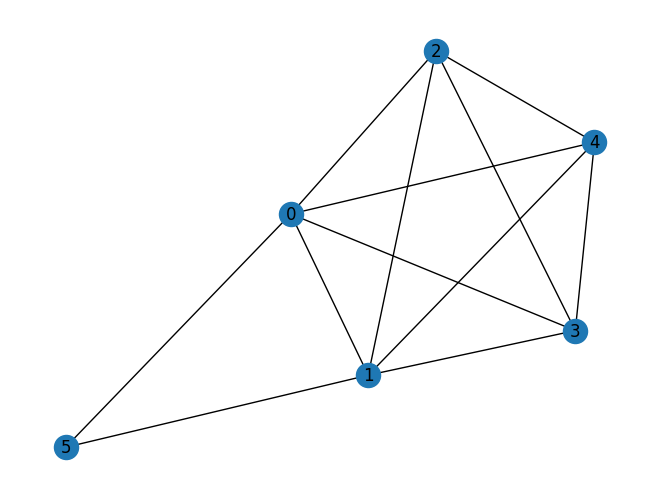

In [69]:
# Test for clustering coefficient
G = nx.complete_graph(5)
# create a non complete graph
G.add_node(5)
G.add_edge(5, 0)
G.add_edge(5, 1)
nx.draw(G, with_labels=True)
print("Number of triangles:", nx.triangles(G))
print("Degree:", G.degree())
print("Clustering coefficient:", nx.clustering(G))

In [70]:
# Calculate the clustering coefficient of repos nodes by languages of repositories
repos_clustering_coefficient = {}
for node in repos_eigenvector_centrality:
    # get the languages of the repository
    languages = graph.nodes[node]['languages']
    # for each language
    for language in languages:
        # if the language is not in the dictionary
        if language not in repos_clustering_coefficient:
            # add the language as a key and the eigenvector centrality as a value
            repos_clustering_coefficient[language] = [repos_eigenvector_centrality[node]]
        # if the language is already in the dictionary
        else:
            # append the eigenvector centrality to the list of values
            repos_clustering_coefficient[language].append(repos_eigenvector_centrality[node])

# Print the clustering coefficient of repos nodes by languages of repositories
print("\nClustering coefficient of repos nodes by languages of repositories:")
for language, centrality in sorted(repos_clustering_coefficient.items(), key=lambda x: sum(x[1])/len(x[1]), reverse=True)[:10]:
    print("Language", language, "has clustering coefficient", sum(centrality)/len(centrality))




Clustering coefficient of repos nodes by languages of repositories:
Language Bison has clustering coefficient 0.17583898274876106
Language Dockerfile has clustering coefficient 0.09251930883085657
Language CSS has clustering coefficient 0.02809218319040909
Language HTML has clustering coefficient 0.006655443129628753
Language JavaScript has clustering coefficient 0.0036993477493662617
Language Shell has clustering coefficient 0.0035511258362106194
Language XSLT has clustering coefficient 0.0031801203658047158
Language COBOL has clustering coefficient 0.0031801203658047158
Language Vala has clustering coefficient 0.0031801203658047158
Language XProc has clustering coefficient 0.0031801203658047158


In [71]:
# Study of homophily in the network
import functools
languages = ['JavaScript', 'Python', 'C++', 'Ruby', 'Java']

user_nodes = [node for node in graph.nodes if node.startswith('u_')]
group_values = lambda x: {k: x.count(k) for k in set(x)}

flatten = lambda l: [item for sublist in l for item in sublist]

# Mark each user their most used language
for user in user_nodes:
    user_repos = graph.nodes[user]['repos']
    
    user_languages = [graph.nodes[repo]['languages'] for repo in user_repos]
    user_languages = group_values(flatten(user_languages))
    user_languages = sorted(user_languages.items(), key=lambda x: x[1], reverse=True)
    
    filtered_languages = [lang for lang in user_languages if lang[0] in languages]
    if (len(filtered_languages) == 0):
        most_used_language = 'Other'
    else:
        most_used_language = filtered_languages[0][0]
    graph.nodes[user]['language'] = most_used_language    

In [72]:
# Creare un arco tra due utenti se hanno almeno un repository in comune
user_edges = []
for u, r in graph.edges:
    repo_subscribers = set(nx.neighbors(graph, r))
    repo_subscribers.remove(u)
    
    user_edges.extend([(u, u0) for u0 in repo_subscribers])

users_graph = nx.Graph()
users_graph.add_edges_from(user_edges)
for u in users_graph.nodes:
    users_graph.nodes[u]['language'] = graph.nodes[u]['language']

nx.attribute_assortativity_coefficient(users_graph, 'language')

0.9474019508170092

In [73]:
# Structural equivalence
def same_repos(r1, r2):
    u_1 = set(nx.neighbors(graph, r1))
    u_2 = set(nx.neighbors(graph, r2))
    
    return u_1 == u_2

repos = [u for u in graph.nodes if u.startswith('r_')]
eq_c = nx.equivalence_classes(repos, same_repos)

# Verify if the relation `same_repos` is an equivalence relation
# since it returns true we create a partition of the repositories
nx.algorithms.community.is_partition(repos, eq_c)

def find_repo_class(r1):
    for c in eq_c:
        if r1 in c:
            return c
        
    # Should never reach this point
    return None

n = len([c for c in eq_c if len(c) <= 1])
m = len([c for c in eq_c if len(c) > 1])

print(n, m)

682 46
